In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sklearn.datasets as ds

In [64]:
# Constants
MAX_ITERS = 1000
error_margin = 0.01
groups = 3
m = 2
identity_matrix = np.eye(2)
space=[[-100,100],[-100,100]]

points_amount = 90

In [65]:
def plot_dataset(X):   
    x1 = np.array(X[:,0])
    x2 = np.array(X[:,1])
    
    fig, ax = plt.subplots()
    ax.scatter(x1,x2)
    ax.set(xlabel='X', ylabel='Y',
           title='Clusters')
    ax.grid()
    plt.show()

<class 'numpy.ndarray'>


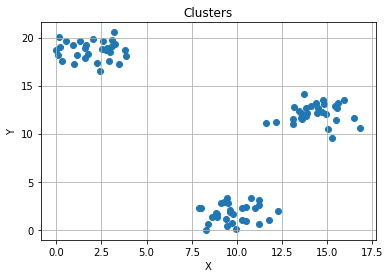

In [66]:
# Preparing dataset
X = np.array([[ 9.63998283,  2.08524305],
       [10.53013606,  0.93894261],
       [14.42463116, 12.15386922],
       [15.2577194 ,  9.52811276],
       [15.52817158, 12.63492038],
       [ 8.8342491 ,  1.72347152],
       [ 8.28068166,  0.        ],
       [ 3.78168867, 18.70492963],
       [ 3.08468795, 19.75842941],
       [ 0.3245534 , 17.60260141],
       [ 3.4478347 , 17.29257195],
       [ 0.96383885, 17.28836135],
       [12.17960113, 11.18772184],
       [ 3.22878608, 19.37549417],
       [ 9.96310985,  0.04636257],
       [11.20500085,  3.09218004],
       [13.72590713, 14.13851266],
       [15.06286649, 10.4907677 ],
       [ 2.98146151, 18.46496892],
       [11.62751166, 11.06421479],
       [ 0.        , 18.72425271],
       [ 0.15040366, 20.09777652],
       [ 1.15893137, 18.15660263],
       [ 2.05496168, 19.86188714],
       [15.4154666 , 12.87532642],
       [ 3.18834777, 20.53405303],
       [13.08991742, 10.9869025 ],
       [ 0.09321151, 18.18497424],
       [ 1.61586171, 17.83806737],
       [10.26870528,  2.30008652],
       [10.27361334,  1.02926934],
       [13.54885869, 11.65378814],
       [ 9.76888263,  1.68203168],
       [13.16781697, 12.78723792],
       [13.10663792, 11.57078698],
       [ 2.39691227, 16.4883025 ],
       [15.92079374, 13.47939626],
       [ 9.1250825 ,  2.810605  ],
       [11.21305144,  0.6490996 ],
       [16.48786831, 11.63645401],
       [ 9.73774457,  0.67131254],
       [ 1.77992283, 18.270667  ],
       [ 8.40354402,  0.56809257],
       [ 2.93502849, 17.56900409],
       [13.88644668, 12.15667391],
       [ 9.40452241,  1.13859529],
       [14.13267163, 12.86784573],
       [14.82961376, 13.05380259],
       [ 2.58790983, 19.62729321],
       [ 7.88952909,  2.23367326],
       [ 9.43214276,  3.27978742],
       [ 9.59814188,  1.8935966 ],
       [ 3.83987587, 18.08487314],
       [11.02629939,  2.27576432],
       [ 8.01103771,  2.30777833],
       [14.77857608, 13.47486556],
       [ 2.25151901, 17.36182336],
       [15.58615625, 13.19438973],
       [ 8.88904661,  1.60435891],
       [16.84512864, 10.61249608],
       [ 2.55275292, 18.85670242],
       [10.807686  ,  3.28483182],
       [ 1.60171235, 18.91149477],
       [13.83842594, 12.70106188],
       [ 1.33041159, 19.61758173],
       [ 9.30314494,  2.8732606 ],
       [ 8.62913241,  1.33996907],
       [13.80669303, 11.82223801],
       [ 9.47877587,  0.34814394],
       [11.76082524,  1.01330563],
       [ 9.48932871,  2.74676359],
       [ 0.23002007, 18.99677931],
       [ 3.10279983, 19.15480232],
       [ 8.9271852 ,  1.32564135],
       [ 2.78886828, 18.92607892],
       [10.52537682,  2.35343695],
       [14.39834047, 13.22969937],
       [13.43435966, 12.35045667],
       [15.50299907, 11.4081639 ],
       [14.95653042, 12.04145116],
       [14.52369287, 12.6290872 ],
       [12.29920824,  1.96276162],
       [13.59710431, 11.5464575 ],
       [ 0.9342039 , 19.2017745 ],
       [ 2.72923641, 18.68581092],
       [13.55126183, 12.1425558 ],
       [ 1.64478108, 19.25102867],
       [14.73966496, 12.27147878],
       [ 0.51021785, 19.63966551],
       [11.24102042,  2.60348015]])
print(type(X))
# Normalizing
min_values = X.min(0)
X = np.subtract(X, min_values)

data_set=np.array(X)

plot_dataset(X)

In [77]:
def select_centers():
    global centers
    global groups
    global space
    centers = []
    iter = 0
    while iter < groups:
        centers.append((random.uniform(space[0][0], space[0][1]),
                        random.uniform(space[1][0], space[1][1])))
        iter = iter + 1

    return centers


def select_assignations():
    assignation = np.zeros((len(X), groups))
    for i in range(len(data_set)):
        remaining = 1
        for k in range(groups - 1):
            rand_num = random.random() * remaining
            remaining -= rand_num
            assignation[i][k] = rand_num
        assignation[i][groups - 1] = remaining
    return assignation


def calculate_differences(assignation, new_assignation):
    return np.sum(np.abs(np.subtract(assignation, new_assignation)))


def mahalanobis_distance(x, v, A=identity_matrix):
    x_v_diff = np.subtract(x, v)
    return math.sqrt(x_v_diff.dot(A).dot(x_v_diff))


def calculate_eta_naive(assignation, distances, i):
    class_assignation_sum_powered = 0
    for k in range(len(distances)):
        class_assignation_sum_powered += assignation[k][i] ** m

    eta_numerator = 0
    for k in range(len(distances)):
        eta_numerator += float(assignation[k, i] ** m) * float(distances[k][i] ** 2)

    return float(eta_numerator) / class_assignation_sum_powered


def calculate_u_naive(x, assignation, centers):
    distances = np.zeros((len(x), groups))
    for k in range(len(x)):
        for i in range(groups):
            distances[k][i] = mahalanobis_distance(x[k], centers[i])

    u = np.ones((len(x), groups))
    for k in range(len(x)):
        for i in range(groups):
            u_new = distances[k][i] ** 2
            u_new = float(u_new) / calculate_eta_naive(assignation, distances, i)
            u_new = float(u_new) ** (float(1) / (m - 1))
            u[k][i] = float(1) / (1 + u_new)

    return u


def calculate_new_centers(x, u):
    um = u ** m
    new_centers = um.T.dot(x) / np.atleast_2d(um.sum(axis=0)).T
    return new_centers


def cluster():
    global error_margin
    global groups

    assignation = np.random.rand(len(X), groups)
    centers = [[0, 20], [10, 0], [15, 15]]

    difference_limit_not_achieved = True
    i = 0
    while i < MAX_ITERS and difference_limit_not_achieved:
        old_assignation = assignation

        assignation = calculate_u_naive(data_set, assignation, centers)
        centers = calculate_new_centers(data_set, assignation)

        if calculate_differences(old_assignation, assignation) < error_margin:
            difference_limit_not_achieved = False
        i = i + 1

    return centers, assignation


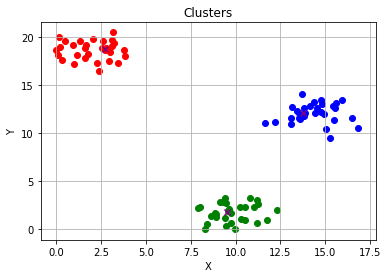

In [78]:
centers, assignation = cluster()

fig, ax = plt.subplots()
ax.set_prop_cycle('c', ['r', 'g', 'b', 'y'])

assignation = np.array(assignation)
for i in range(groups):
    points_in_cluster = data_set[(np.argmax(assignation, axis=1) == i)]
    ax.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1])
    
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],marker='x',c='purple')
ax.set(xlabel='X', ylabel='Y',
       title='Clusters')
ax.grid()
plt.show()